In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [12]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [16]:
import yfinance as yf

In [70]:
tech_list=['AAPL' ,'GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [101]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,daily return
Date,,,,,,,,,,
2023-04-21,165.050003,166.449997,164.490005,165.020004,164.143860,58337300,NaN,NaN,NaN,NaN
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452194,41949600,NaN,NaN,NaN,0.001878
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100,NaN,NaN,NaN,-0.009436
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800,NaN,NaN,NaN,-0.000061
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515869,64902300,NaN,NaN,NaN,0.028395


In [102]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,143.140677,144.720836,141.638925,143.231952,143.231952,5.214624e+07
std,21.438861,21.440810,21.355853,21.432737,21.432737,1.957819e+07
min,101.470001,103.900002,101.150002,102.050003,102.050003,2.237840e+07
25%,128.610001,130.055000,126.959999,128.309998,128.309998,4.141355e+07
50%,138.990005,140.410004,137.449997,138.559998,138.559998,4.826000e+07
75%,155.214996,156.630005,153.914993,155.189995,155.189995,5.769340e+07
max,187.720001,189.770004,185.509995,189.050003,189.050003,1.529387e+08


<AxesSubplot:xlabel='Date'>

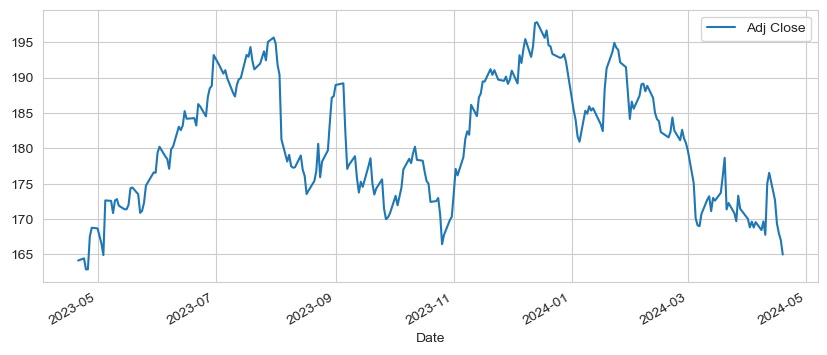

In [103]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [104]:
ma_day=[10,20,50]
    
for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

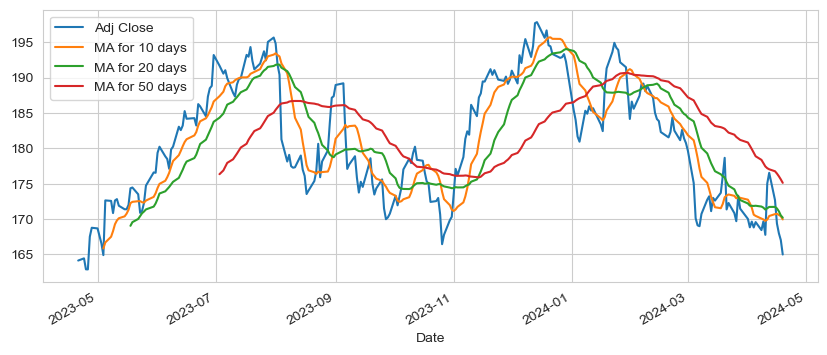

In [105]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

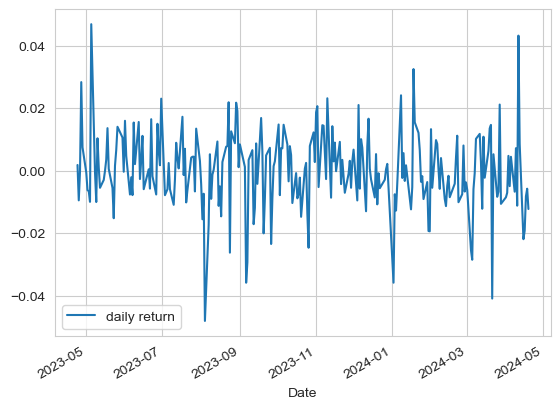

In [106]:
AAPL['daily return']=AAPL['Adj Close'].pct_change()

AAPL['daily return'].plot(legend=True)

<AxesSubplot:>

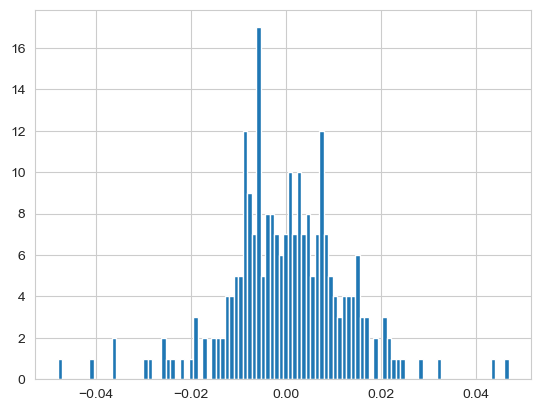

In [107]:
AAPL['daily return'].hist(bins=100)

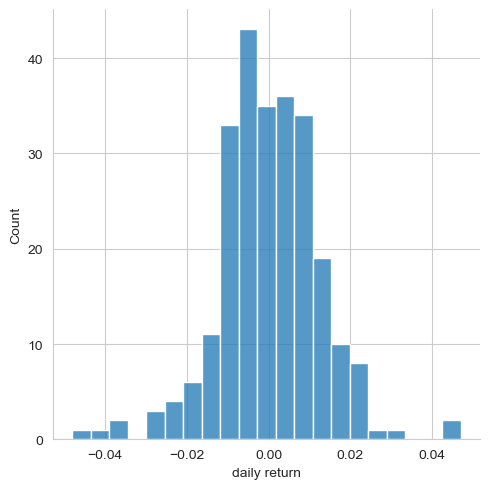

In [90]:
sns.displot(AAPL['daily return'])

In [97]:
# Concatenate the stock DataFrames into a single DataFrame
closing_df = pd.concat([stock_data[stock]['Adj Close'] for stock in tech_list], axis=1)
closing_df.columns = tech_list  # Assign column names


tech_returns = closing_df.pct_change().dropna()


In [98]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-04-21,164.143860,105.910004,283.433777,106.959999
2023-04-24,164.452209,106.779999,279.476257,106.209999
2023-04-25,162.900497,104.610001,273.177979,102.570000
2023-04-26,162.890533,104.449997,292.965515,104.980003
2023-04-27,167.515869,108.370003,302.348541,109.820000


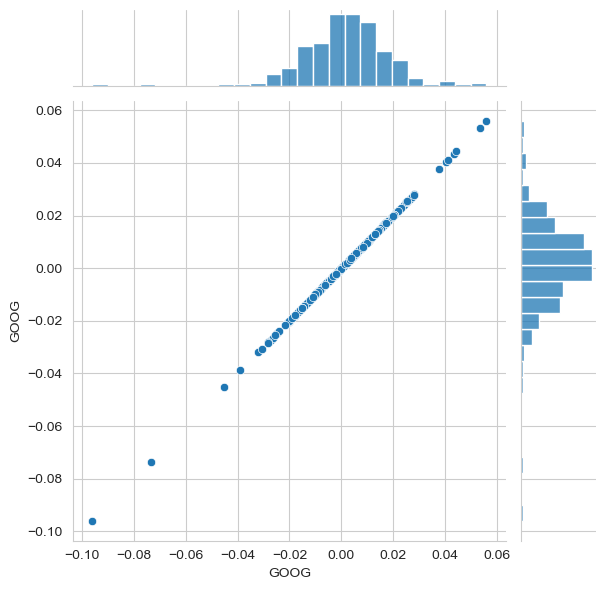

In [99]:
#compare two diff stocks

sns.jointplot(x='GOOG',y='GOOG',data=tech_df)

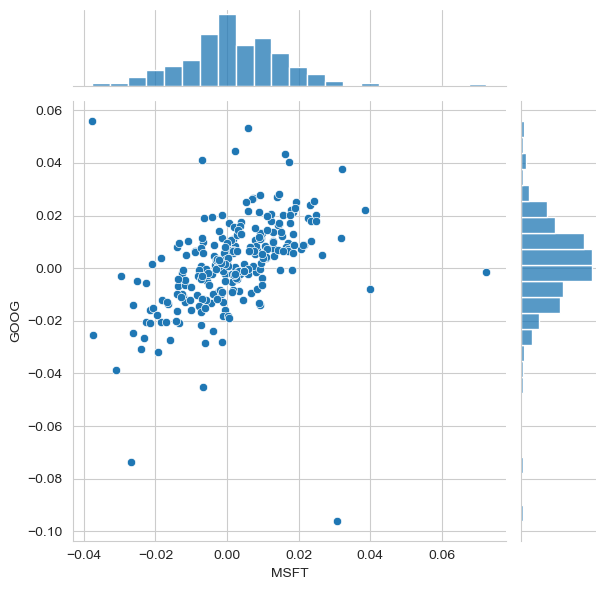

In [100]:
sns.jointplot(x='MSFT',y='GOOG',data=tech_df)

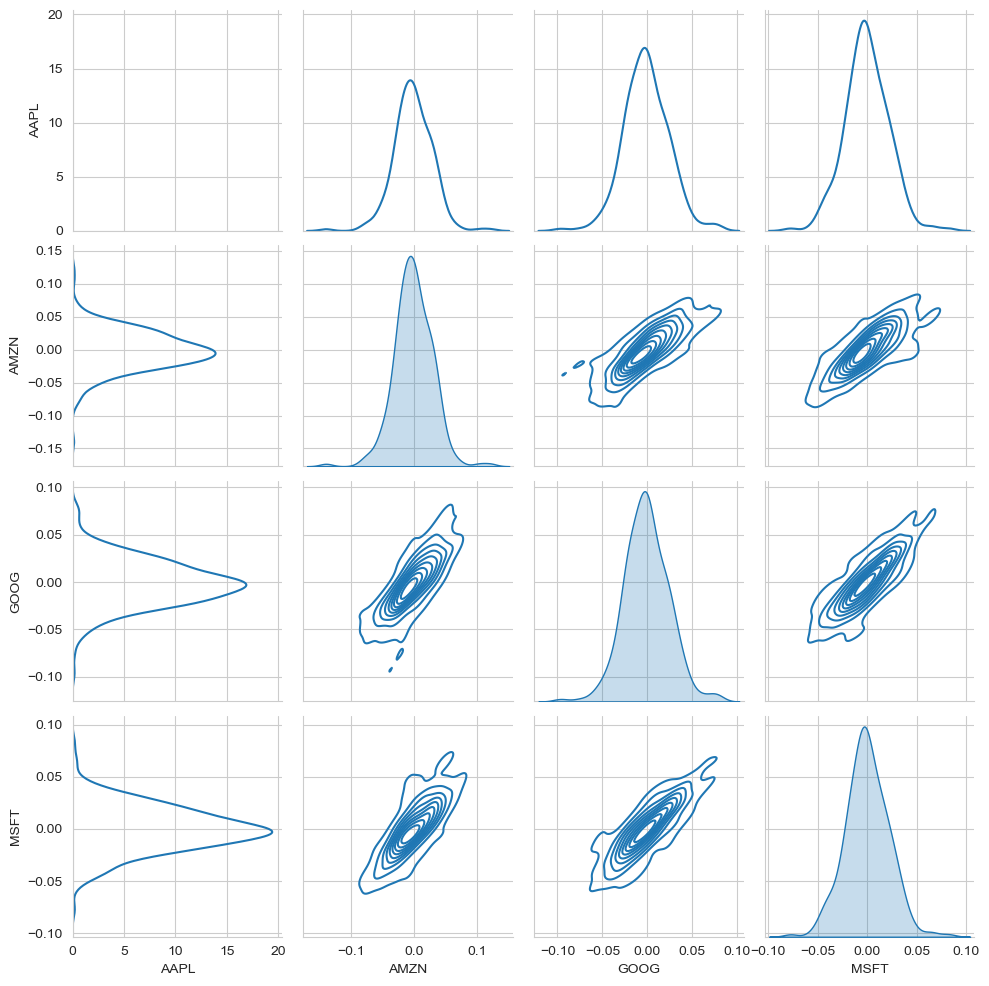

In [84]:
#pair plots

sns.pairplot(tech_df,kind='kde')

In [92]:
# Prepare data for prediction
X = tech_returns[['GOOG', 'MSFT', 'AMZN']]
y = tech_returns['AAPL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [94]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [95]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

Train RMSE: 0.010471782596200466
Test RMSE: 0.009410573771648466
Train R^2 Score: 0.2898810937026053
Test R^2 Score: 0.40521297274432433


In [96]:

# Perform a prediction for future stock prices
future_goog_price = 2000.0  # Example future price for Google
future_msft_price = 300.0   # Example future price for Microsoft
future_amzn_price = 3300.0  # Example future price for Amazon

# Use the trained model to predict the future AAPL price
future_aapl_price = model.predict([[future_goog_price, future_msft_price, future_amzn_price]])
print("Predicted future AAPL price:", future_aapl_price)


Predicted future AAPL price: [560.73839964]


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
